In [1]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
df = pd.read_csv("Dataset1.csv")
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df

/tmp/ipykernel_5953/1969035014.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,1922171,2012-07-01,12:44,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,108 STREET,...,0,0,0,0,0,Unspecified,Unspecified,254996,PASSENGER VEHICLE,PASSENGER VEHICLE
1,1921573,2012-07-01,21:30,BROOKLYN,11237,40.694988,-73.907296,"(40.6949882, -73.9072959)",IRVING AVENUE,WEIRFIELD STREET,...,0,0,0,0,0,Unspecified,Unspecified,184525,PASSENGER VEHICLE,UNKNOWN
2,1922185,2012-07-01,12:07,BROOKLYN,11206,40.708627,-73.945124,"(40.7086265, -73.9451243)",MANHATTAN AVENUE,SCHOLES STREET,...,0,0,0,3,0,Unspecified,Unspecified,193860,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
3,1922186,2012-07-01,9:40,QUEENS,11369,40.767470,-73.881859,"(40.7674704, -73.8818593)",23 AVENUE,88 STREET,...,0,0,0,0,0,Unspecified,Unspecified,279641,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON
4,1922187,2012-07-01,0:25,QUEENS,11375,40.732979,-73.844348,"(40.7329792, -73.8443478)",GRND CNTRL PARKWAY SR WEST,65 AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,264072,PASSENGER VEHICLE,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304278,1621044,2013-12-31,10:45,MANHATTAN,10033.0,40.851180,-73.939238,"(40.8511796, -73.9392377)",WEST 181 STREET,PINEHURST AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,72297,PASSENGER VEHICLE,BUS
304279,1621042,2013-12-31,16:15,MANHATTAN,10010.0,40.735390,-73.975110,"(40.7353901, -73.9751095)",AVENUE C,EAST 23 STREET,...,0,0,0,0,0,Unspecified,Unspecified,25634,VAN,PASSENGER VEHICLE
304280,1629281,2013-12-31,18:40,BRONX,10468.0,40.862735,-73.903320,"(40.862735, -73.9033202)",WEST FORDHAM ROAD,GRAND AVENUE,...,0,0,0,0,0,Turning Improperly,Lost Consciousness,113047,TAXI,PASSENGER VEHICLE
304281,1629238,2013-12-31,11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,Unspecified,Unspecified,3097535,PASSENGER VEHICLE,PASSENGER VEHICLE


{'JUL-2012': [6, 3, 13], 'AUG-2012': [15, 1, 11], 'SEPT-2012': [13, 1, 12], 'OCT-2012': [13, 1, 7], 'NOV-2012': [8, 0, 6], 'DEC-2012': [17, 0, 10]}
Index(['JUL-2012', 'AUG-2012', 'SEPT-2012', 'OCT-2012', 'NOV-2012',
       'DEC-2012'],
      dtype='object')


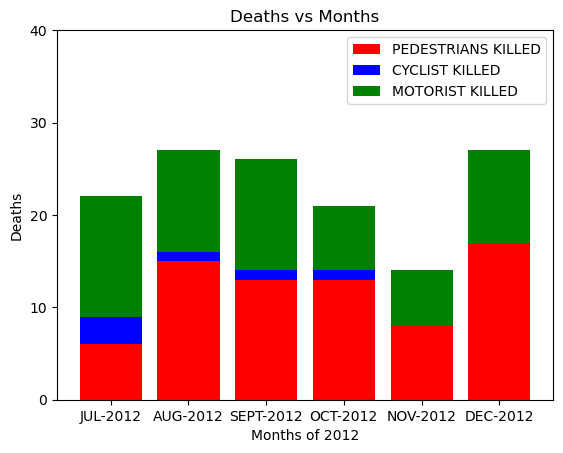

In [44]:
df1 = df[df['CRASH DATE']>='2012-01-01']
df1 = df1[df1['CRASH DATE']<='2012-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2012-07-01" and row['CRASH DATE']<="2012-07-31":
        return "JUL-2012"
    elif row['CRASH DATE']>="2012-08-01" and row['CRASH DATE']<="2012-08-31":
        return "AUG-2012"
    elif row['CRASH DATE']>="2012-09-01" and row['CRASH DATE']<="2012-09-30":
        return "SEPT-2012"
    elif row['CRASH DATE']>="2012-10-01" and row['CRASH DATE']<="2012-10-31":
        return "OCT-2012"
    elif row['CRASH DATE']>="2012-11-01" and row['CRASH DATE']<="2012-11-30":
        return "NOV-2012"
    elif row['CRASH DATE']>="2012-12-01"and row['CRASH DATE']<="2012-12-31":
        return "DEC-2012"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
# dict is for killed and first is ped, second is cyclist, and the third is motorist.
dict = {
    'JUL-2012':[0,0,0],
    'AUG-2012':[0,0,0],
    'SEPT-2012':[0,0,0],
    'OCT-2012':[0,0,0],
    'NOV-2012':[0,0,0],
    'DEC-2012':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JUL-2012':
        dict['JUL-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['JUL-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['JUL-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='AUG-2012':
        dict['AUG-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['AUG-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['AUG-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='SEPT-2012':
        dict['SEPT-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['SEPT-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['SEPT-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='OCT-2012':
        dict['OCT-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['OCT-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['OCT-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='NOV-2012':
        dict['NOV-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['NOV-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['NOV-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='DEC-2012':
        dict['DEC-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['DEC-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['DEC-2012'][2]+=row['NUMBER OF MOTORIST KILLED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS KILLED','CYCLIST KILLED','MOTORIST KILLED'])
df2
print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS KILLED'],color='r')
plt.bar(df2.index,df2['CYCLIST KILLED'],bottom=df2['PEDESTRIANS KILLED'],color='b')
plt.bar(df2.index,df2['MOTORIST KILLED'],bottom=df2['CYCLIST KILLED']+df2['PEDESTRIANS KILLED'],color='g')
plt.xlabel("Months of 2012")
plt.ylabel("Deaths")
plt.legend(["PEDESTRIANS KILLED", "CYCLIST KILLED", "MOTORIST KILLED"])
plt.title("Deaths vs Months")
plt.yticks([0,10,20,30,40])
plt.show()

{'JUL-2012': [855, 450, 3550], 'AUG-2012': [850, 508, 3393], 'SEPT-2012': [893, 434, 3362], 'OCT-2012': [977, 329, 3260], 'NOV-2012': [1037, 277, 2681], 'DEC-2012': [1294, 212, 3085]}
Index(['JUL-2012', 'AUG-2012', 'SEPT-2012', 'OCT-2012', 'NOV-2012',
       'DEC-2012'],
      dtype='object')


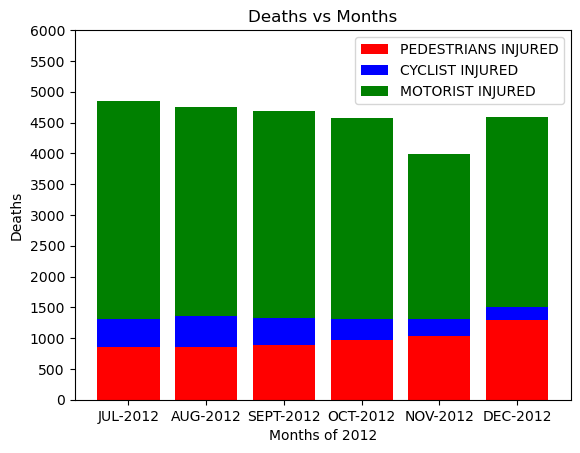

In [48]:
df1 = df[df['CRASH DATE']>='2012-01-01']
df1 = df1[df1['CRASH DATE']<='2012-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2012-07-01" and row['CRASH DATE']<="2012-07-31":
        return "JUL-2012"
    elif row['CRASH DATE']>="2012-08-01" and row['CRASH DATE']<="2012-08-31":
        return "AUG-2012"
    elif row['CRASH DATE']>="2012-09-01" and row['CRASH DATE']<="2012-09-30":
        return "SEPT-2012"
    elif row['CRASH DATE']>="2012-10-01" and row['CRASH DATE']<="2012-10-31":
        return "OCT-2012"
    elif row['CRASH DATE']>="2012-11-01" and row['CRASH DATE']<="2012-11-30":
        return "NOV-2012"
    elif row['CRASH DATE']>="2012-12-01"and row['CRASH DATE']<="2012-12-31":
        return "DEC-2012"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
# dict is for killed and first is ped, second is cyclist, and the third is motorist.
dict = {
    'JUL-2012':[0,0,0],
    'AUG-2012':[0,0,0],
    'SEPT-2012':[0,0,0],
    'OCT-2012':[0,0,0],
    'NOV-2012':[0,0,0],
    'DEC-2012':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JUL-2012':
        dict['JUL-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['JUL-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['JUL-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='AUG-2012':
        dict['AUG-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['AUG-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['AUG-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='SEPT-2012':
        dict['SEPT-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['SEPT-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['SEPT-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='OCT-2012':
        dict['OCT-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['OCT-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['OCT-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='NOV-2012':
        dict['NOV-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['NOV-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['NOV-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='DEC-2012':
        dict['DEC-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['DEC-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['DEC-2012'][2]+=row['NUMBER OF MOTORIST INJURED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS INJURED','CYCLIST INJURED','MOTORIST INJURED'])
df2
print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS INJURED'],color='r')
plt.bar(df2.index,df2['CYCLIST INJURED'],bottom=df2['PEDESTRIANS INJURED'],color='b')
plt.bar(df2.index,df2['MOTORIST INJURED'],bottom=df2['CYCLIST INJURED']+df2['PEDESTRIANS INJURED'],color='g')
plt.xlabel("Months of 2012")
plt.ylabel("Deaths")
plt.legend(["PEDESTRIANS INJURED", "CYCLIST INJURED", "MOTORIST INJURED"])
plt.title("Deaths vs Months")
plt.yticks(range(0,6500,500))
plt.show()